In [9]:
from utils import load, dump
from evaluate import eval, load_trained
from os import getcwd
from tqdm import tqdm
import torch

In [10]:
root = f'{getcwd()}/..'

## Let's evaluate the BERTOverflow classifiers

In [11]:
checkpoint = "jeniya/BERTOverflow"
data = load(f'{root}/data/prd_backtick-se_cowait_annotated.json')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at jeniya/BERTOverflow and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


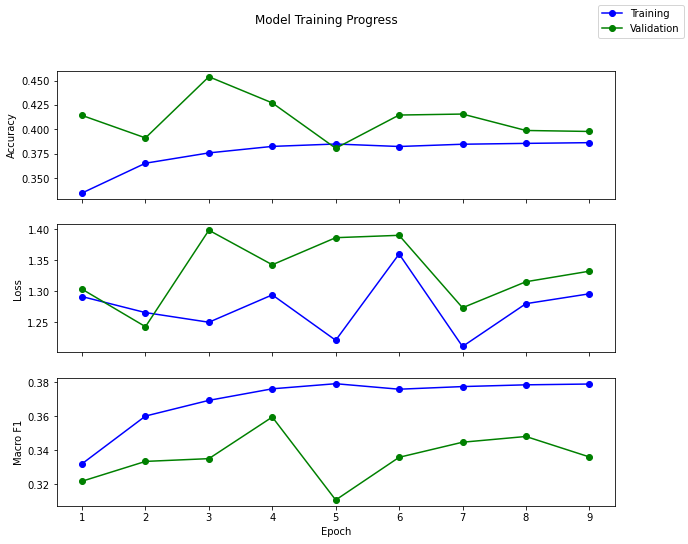

In [12]:
predict, plot_progress = load_trained(checkpoint, f'{root}/data/big_data/BOF_model_40k_balanced_1e-3_solid.pt')
plot_progress()

In [ ]:
predict, plot_progress = load_trained(checkpoint, f'{root}/data/big_data/BOF_model_40k_unbalanced_1e-3_solid.pt')
plot_progress()

In [13]:
y_true = []
y_pred = []

for pr in tqdm(data):
    title = pr['title']
    pcat = predict(title)
    tcat = pr['category']
    
    y_true.append(tcat)
    y_pred.append(pcat)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [04:36<00:00,  1.54s/it]


In [14]:
eval(y_true, y_pred)

                precision    recall  f1-score   support

      fix-bugs       0.20      0.16      0.18        32
  new-features       0.20      0.16      0.18        49
 documentation       0.08      0.88      0.15         8
non-functional       0.25      0.08      0.12        91

      accuracy                           0.15       180
     macro avg       0.18      0.32      0.16       180
  weighted avg       0.22      0.15      0.15       180

[[ 5  2 13 12]
 [ 4  8 28  9]
 [ 1  0  7  0]
 [15 30 39  7]]
